**Статистическое сопоставление цены биткоина с ценой фонда S&P500 и ценой на золото.**

Датасет взят с https://www.kaggle.com/datasets/prasertk/bitcon-gold-oil-sp-500?resource=download.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

full_dataset = pd.read_csv(r'SP500 oil gold bitcoin.csv')
dataset = full_dataset[[r'Date', r'BITCOIN', r'Gold', r'S&P500']]
dataset.head()

,Date,BITCOIN,Gold,S&P500
0,2010-07-18,0.1,1188.0,1064.88
1,2010-07-19,0.1,1181.7,1071.25
2,2010-07-20,0.1,1191.5,1083.48
3,2010-07-21,0.1,1191.6,1069.59
4,2010-07-22,0.1,1195.5,1093.67


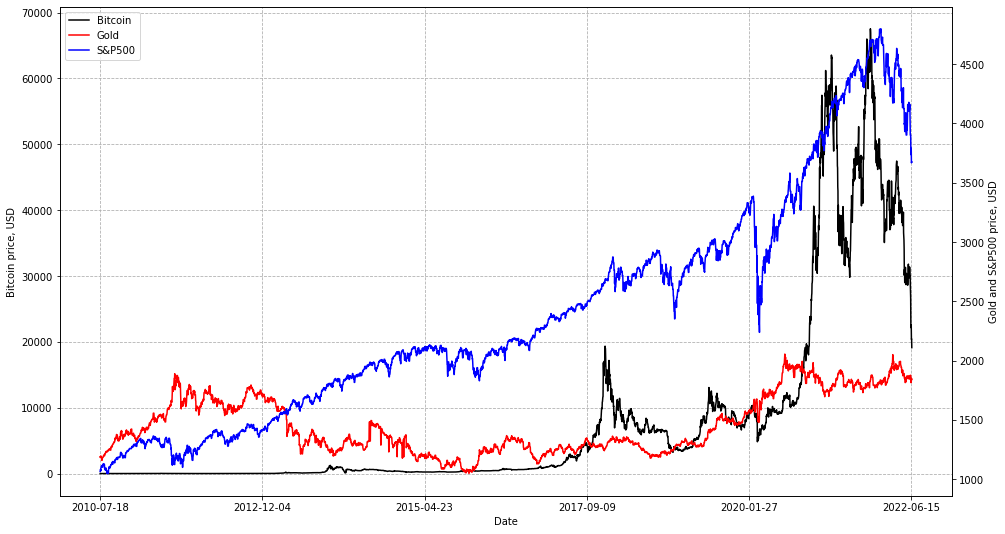

In [3]:
fig, ax = plt.subplots(1, figsize=(16, 9))
ax_right = ax.twinx()
ax.grid(ls='--')
lnb, = ax.plot(dataset.BITCOIN, c='k', label='Bitcoin')
lng, = ax_right.plot(dataset.Gold, c='r', label='Gold')
lns, = ax_right.plot(dataset['S&P500'], c='b', label='S&P500')
ax.set_xticks(dataset.index[::int(dataset.index.size/5)])
ax.set_xticklabels(dataset.Date[::int(dataset.Date.size/5)])
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin price, USD')
ax_right.set_ylabel('Gold and S&P500 price, USD')
ax.legend(handles=[lnb, lng, lns], loc='upper left')
plt.show()

**Матрица корреляций.**

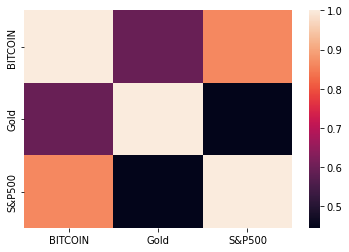

In [22]:
correlation_matrix = dataset.corr().abs()
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.show()

Цена биткоина лучше скоррелированна с ценой фонда S&P500.

**Коэффициенты линейной регрессии цены биткоина и цены золота, а также цены биткоина и цены фонда S&P500**

Bitcoin - Gold: a = 1377.5353192662274, b = [0.00995069], r = 0.35357512471537955
Bitcoin - S&P500: a = 1940.3668456472087, b = [0.05560304], r = 0.7434323910553949


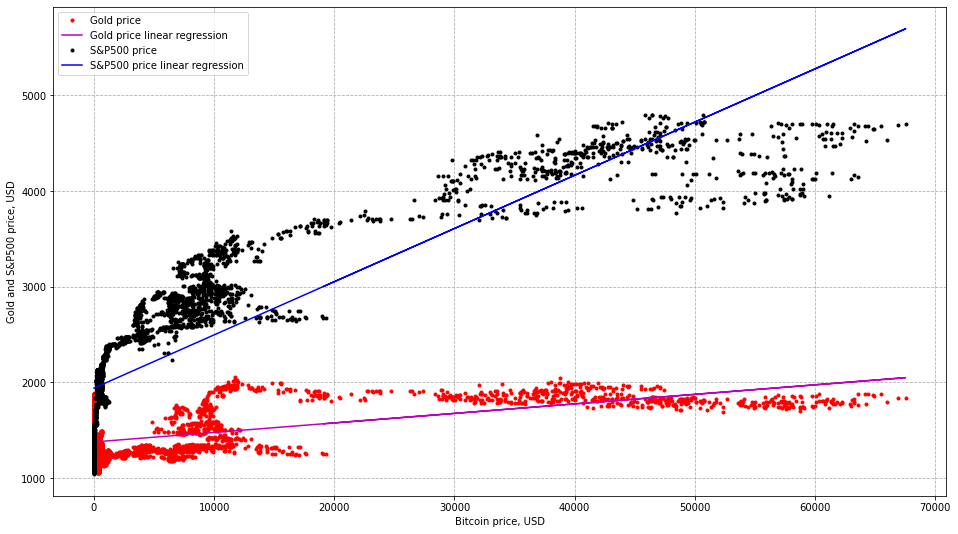

In [23]:
from sklearn.linear_model import LinearRegression

model_gold, model_sp = LinearRegression(), LinearRegression()
X = np.array(dataset.BITCOIN).reshape(-1, 1)
yg, ys = dataset['Gold'], dataset['S&P500']
model_gold.fit(X, yg)
model_sp.fit(X, ys)
r_gold = model_gold.score(X, yg)
r_sp = model_sp.score(X, ys)
print(f'Bitcoin - Gold: a = {model_gold.intercept_}, b = {model_gold.coef_}, r = {r_gold}')
print(f'Bitcoin - S&P500: a = {model_sp.intercept_}, b = {model_sp.coef_}, r = {r_sp}')
gold_price_lr = model_gold.predict(X)
sp_price_lr = model_sp.predict(X)
fig, ax = plt.subplots(1, figsize=(16, 9))
ax.grid(ls='--')
lng, = ax.plot(dataset.BITCOIN, dataset.Gold, '.', c='r', label='Gold price')
lngr, = ax.plot(dataset.BITCOIN, gold_price_lr, c='m', label='Gold price linear regression')
lns, = ax.plot(dataset.BITCOIN, dataset['S&P500'], '.', c='k', label='S&P500 price')
lnsr, = ax.plot(dataset.BITCOIN, sp_price_lr, c='b', label='S&P500 price linear regression')
ax.set_xlabel('Bitcoin price, USD')
ax.set_ylabel('Gold and S&P500 price, USD')
ax.legend(handles=[lng, lngr, lns, lnsr], loc='upper left')
plt.show()

**Дисперсионный анализ.**

In [17]:
mean_prices = {}
for column in dataset.columns[1:]:
    mean_prices[column] = dataset[column].mean()
    print(f'{column} mean price: {round(mean_prices[column], 4)} USD')

BITCOIN mean price: 8101.0184 USD
Gold mean price: 1458.1461 USD
S&P500 mean price: 2390.8081 USD


Установим статистическую значимость различия средних значений с $\alpha = 0.95$.

In [20]:
all_prices = np.concatenate([dataset[column] for column in dataset.columns[1:]])
n = all_prices.shape[0]
all_prices_mean = all_prices.mean()
S2 = np.sum((all_prices - all_prices_mean)**2)
S2_f = ((mean_prices['BITCOIN'] - all_prices_mean)**2) * len(dataset['BITCOIN']) + ((mean_prices['Gold'] - all_prices_mean)**2) * len(dataset['Gold']) + ((mean_prices['S&P500'] - all_prices_mean)**2) * len(dataset['S&P500'])
S2_residual = np.sum((dataset['BITCOIN'] - mean_prices['BITCOIN'])**2) + np.sum((dataset['Gold'] - mean_prices['Gold'])**2) + np.sum((dataset['S&P500'] - mean_prices['S&P500'])**2)
print(f'S2 = {round(S2, 8)} = S2_f + S2_residual = {round(S2_f + S2_residual, 8)}')
k = 3
sigma2_general = S2 / (n - 1)
sigma2_f = S2_f / (k - 1)
sigma2_residual = S2_residual / (n - k)
F_h = sigma2_f / sigma2_residual
df_bt, df_in = k - 1, n - k
print(df_bt, df_in)

S2 = 1046070165475.3816 = S2_f + S2_residual = 1046070165475.3817
2 13059


По таблице критических точек распределения Фишера-Снедекора $F_{crit} = 2.99$

In [21]:
F_crit = 2.99
if F_h > F_crit:
    print('Различие в цене в 3 группах статистически значимо')
else:
    print('Различие в цене в 3 группах статистически не значимо')

Различие в цене в 3 группах статистически значимо
